# <center> Tratamiento formal de diferencia de imágenes con PSF espacialmente variable</center>

 ### <center> Búsqueda de eventos transitorios</center>

###  <center> Bruno Sánchez, M. Domínguez, M. Lares </center>
####  <center> Reunión anual de Asociación Argentina de Astronomía </center>
####  <center> San Juan - Septiembre 2016 </center>

## <center>Astronomía de series temporales </center>


|**Estallidos de rayos gamma**|**Ondas Gravitacionales**|** y más**|
|:---:|:---:|:---:|
|<img src='GCN.gif'style="float:center;" width=350/>|<img src='lead_960.jpg' alt='GW' style="float:left;" width=390/>|<img src='telescope-01.jpg' width=250>|

## <center>Eventos transitorios</center>
<img src="Supernova_Image_Light_Curve_Spectrum_Illustration_of.gif" width=700>


## El desafío


**Buscar objetos transitorios en el cielo requiere:**

* Instrumento dedicado 

* *Pipeline* veloz

* Análisis de diferencias de imágenes (DIA)

## El instrumento: Proyecto TOROS   


#### Un proyecto de telescopio sinoptico en el NOA Argentino
<img src='macon.png'>

## <center> La Pipeline: TOROS Pipeline </center>

### <center>El software CORRAL</center>

<img src='logo_corral.jpg', style='float:center', width=350>

##  <center>Estructura de la Pipeline</center>

<img src='pipeline.png' width=1100>

## *Difference Image Analysis* (DIA)


* Alard & Lupton 1998: "A Method for Optimal Image Subtraction"

    $$ Ref(x, y) \otimes Kernel (u, v) = I(x, y) $$
    
    $$ Kernel (u, v) = \sum\limits_{n} a_n N(\mu=0, \sigma_u, \sigma_v) p_u(u) p_v(v) $$

## *Difference Image Analysis* (DIA)

Es necesario igualar $PSF$ entre ambas imágenes.

<img src='OGC128075dif.png'>

##  *Diference Image Analysis* (DIA)
* Bramich 2008: "A new algorithm for difference image analysis"

    $$ I_{ij}=\sum\limits_{l, m} K_{lm}R_{i+l, j+m}  + B_0 $$

* Bramich 2013, 2015, 2016; Varias mejoras y detalles

* Zackay, Ofek & Gal-Yam 2016: "Proper image subtraction - optimal transient detection, photometry and hypothesis testing"

** En todas las técnicas es necesario medir PSF**

Algunas la asumen constante, o constante en regiones.

### Zackay, Ofek, Gal-Yam (2016)

**Referencia**
    
$$R(x, y) = T(x, y) \otimes P_r(u, v, x, y)  + \epsilon_r $$

**Nueva Imagen **
    
$$ I(x, y) = T(x, y) \otimes P_n(u, v, x, y)  + \epsilon_n $$ 

## **ProperImage**

* *ProperImage* es un paquete en Python que implementa las técnicas de Zackay & Ofek (2016)

* Utiliza *Karhunen-Loeve* para estimar PSF variable en el espacio (Lauer 2002): es un método para extraer la máxima información posible de un conjunto de $N$ observaciones, reduciendo la dimensionalidad:


$$ P(u, v, x, y) = \sum\limits_{i=1}^{\infty} a_i(u, v) p_i(x, y) \approx \sum\limits_{i=1}^{K} a_i(u, v) p_i(x, y) $$

$$ I(x, y) = \sum\limits_{i=1}^{K}a_i(x, y)  (T \otimes p_i)(x, y) $$

## **ProperImage**

$$ C_{i, j} = < P^*_i , P^*_j> $$

Autovalores, autovectores:  $$ \lambda_j, \overrightarrow{\omega_j} $$

Al calcular los $\lambda_j$ podemos despreciar aquellos que poseen auto-valores cercanos a cero.

Esto reduce la dimensión del problema a una dimension $ K << N $. Típicamente: $ K = 1 $.

Si la Psf varía intensamente es probable un orden mayor.

$$ p_i = \sum\limits_{j=1}^{N}(\overrightarrow{\omega_i})_j P^*_j $$

## **ProperImage**

Los campos $ a_i(x, y) $ son determinados mediante proyecciones:

$$ a_j(x_i, y_i) = \frac{ <P^*_i , p_j >}{ \|p_j\|^2} $$

Y luego se ajustan polinomios de orden 4, bidimensionales.


**Nueva Imagen **
    
$$ I_{|H_0}(x, y) = T(x, y) \otimes P_n(u, v)  + \epsilon_n $$

**Transitorio  **
    
$$ I_{|H_1(q, \alpha)}(x, y) = (T(x, y) + \alpha \delta_q(x,y)) \otimes P_n(u,v) + \epsilon_n $$

El *likelihood ratio* se define como:

<center>$$ \mathcal{L} (q, \alpha) = \frac{\mathcal{P}(I, R | \mathcal{H}_0)}{\mathcal{P}(I, R | \mathcal{H}_1(q, \alpha))} $$</center>

El estadístico óptimo para detección de fuentes entonces es el siguiente:

<center>$$ \widehat{S} \equiv \widehat{\frac{1}{\alpha} \log{\mathcal{L}}} $$</center>

El cual se calcula simultaneamente para todo valor de $$\alpha $$

Y la diferencia de imágenes óptima es entonces:

<center>$$ \widehat{D} = \lambda(F_r \widehat{P_r}\widehat{N} - F_n  \widehat{P_n}\widehat{R})  $$</center>

Y se relaciona con el valor de $S$:


<center>$$ \widehat{S} = \widehat{D} \overline{\widehat{P_D}} $$</center>

## **ProperImage**

Un ejemplo:

In [1]:
path = 'test_frame.fits'
rebuildpath = 'frame_rebuild.fits'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from properimage import utils 
%matplotlib inline

In [3]:
font = {'size' : 32}
plt.rc('font', **font)

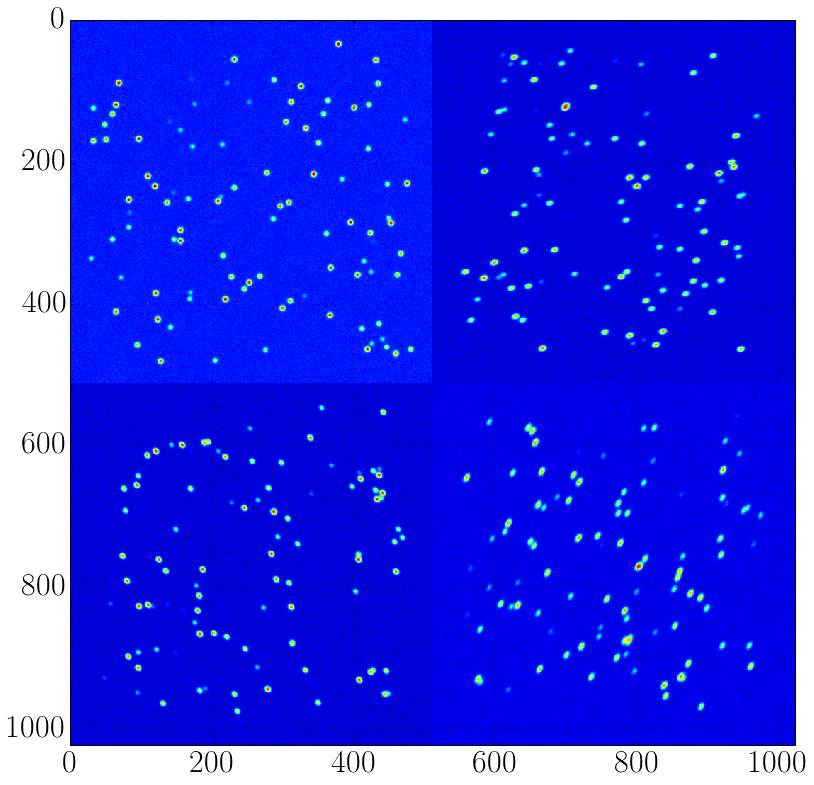

In [4]:
plt.figure(figsize=(13,13))
plt.imshow(np.log(fits.getdata(path)), interpolation='none')
plt.grid()

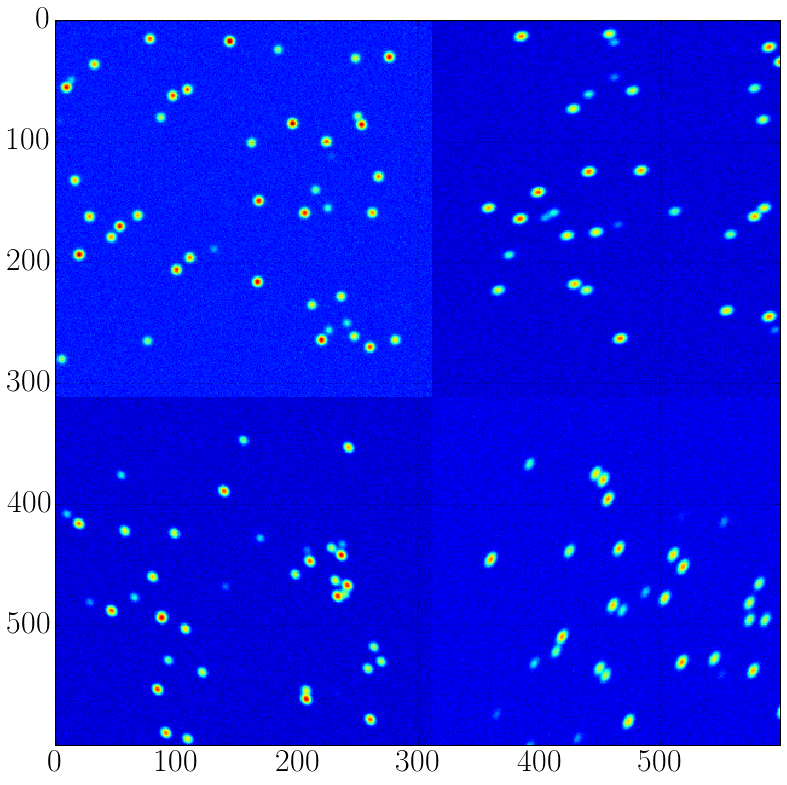

In [5]:
plt.figure(figsize=(13,13))
plt.imshow(np.log(fits.getdata(path)[200:800, 200:800]), interpolation='none')
plt.grid()

In [6]:
import properimage.propercoadd as pc

with pc.SingleImage(path) as img:
    afields, psf = img.get_variable_psf(pow_th=0.0008)

background subtracted image obtained
background subtracted image obtained
raw sources = 350
Sources good to calculate = 180
returning best sources

Fitshape = (15, 15)
obtainig KL basis, using k = 9
returning variable psf
cleaning... 


In [7]:
reload(utils)
font = {'size' : 23}; plt.rc('font', **font)

In [8]:
utils.plot_psfbasis??

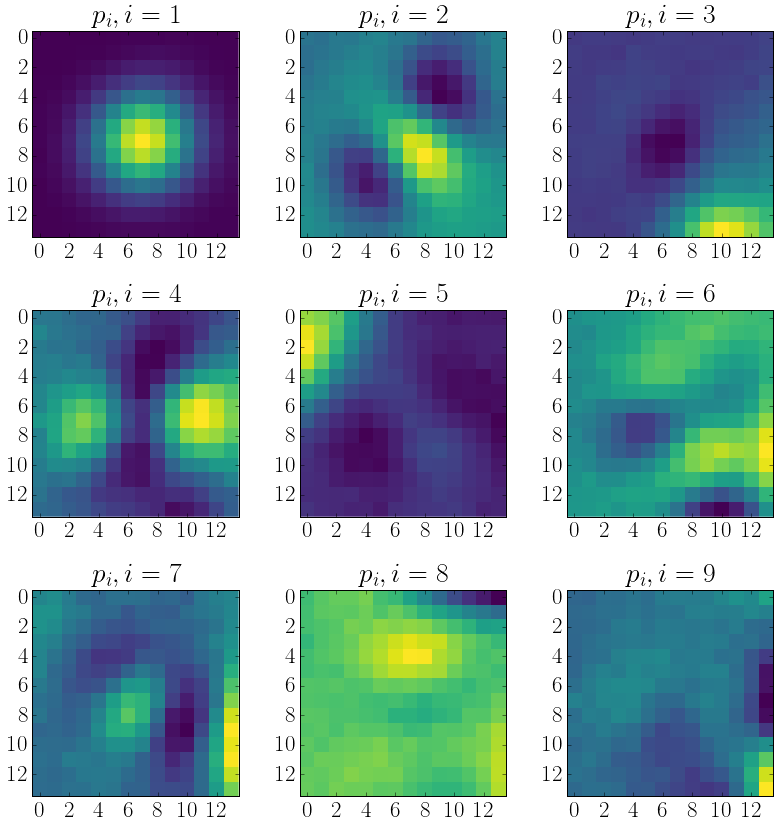

In [9]:
utils.plot_psfbasis(psf, nbook=True, path='psf_basis_new.svg', interpolation='none')

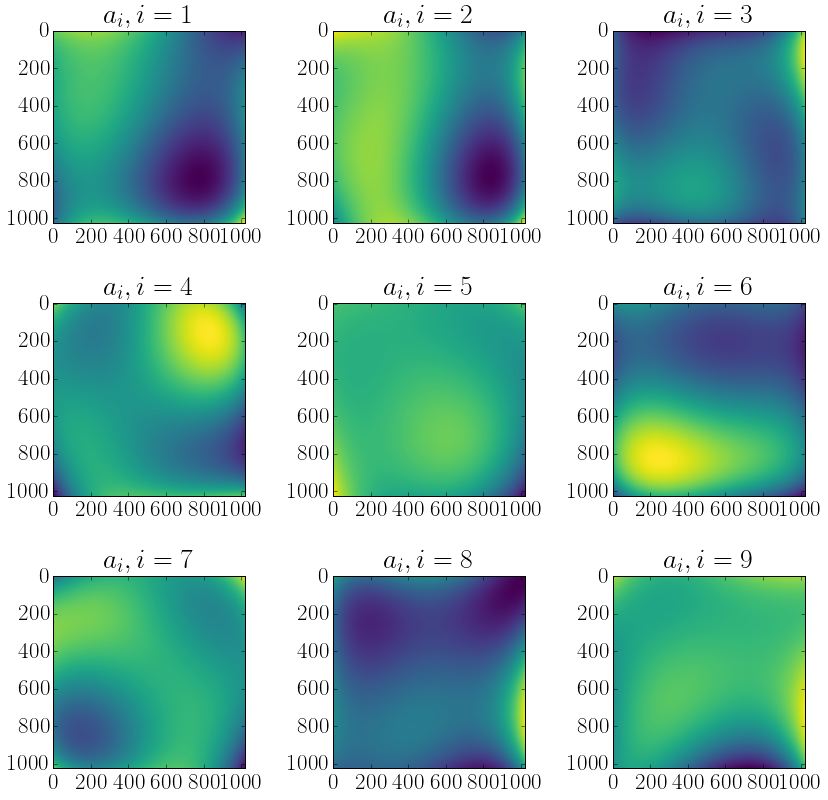

In [10]:
utils.plot_afields(afields, fits.getdata(path).shape, nbook=True, path='a_fields.svg')

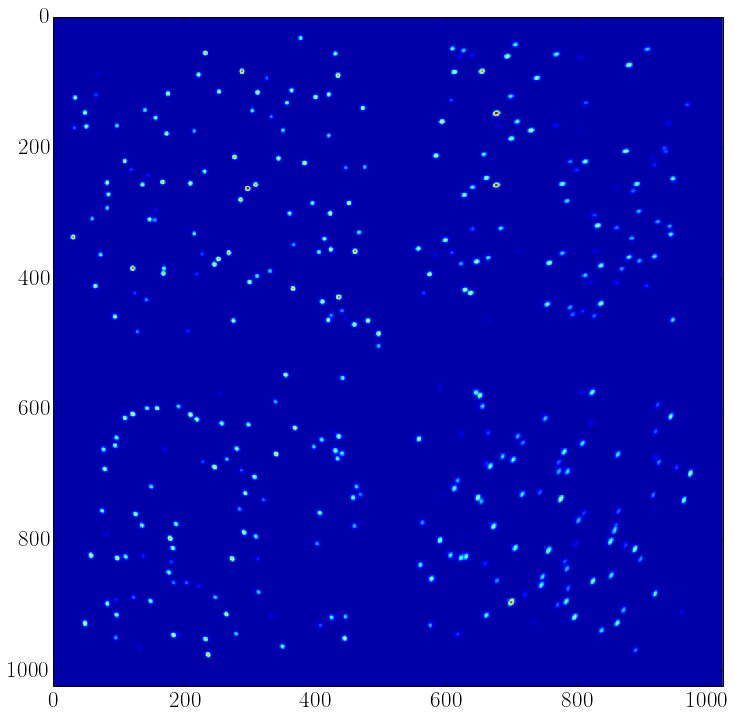

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(np.log(fits.getdata(rebuildpath)), interpolation='none')

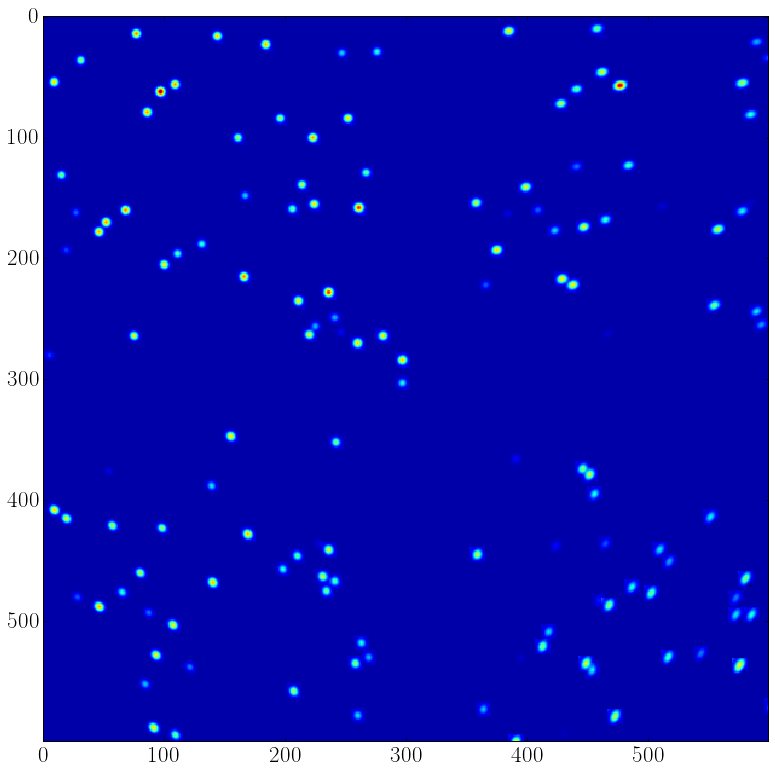

In [12]:
utils.plt.figure(figsize=(13,13))
utils.plt.imshow(np.log(fits.getdata(rebuildpath)[200:800, 200:800]), interpolation='none')

$$I(x, y) = \sum\limits_{j=1}^K a_j(x, y) \bigg[\sum\limits_{x=1}^{N}\delta_{(x_i, y_i)}\otimes p_j\bigg] $$

## Aplicaciones:

* El método de medición de PSF está aplicado en ***ProperImage*** para 
    * Coadición de imágenes
    * Substracción de imágenes **(es necesario *Real-Bogus*?)**
    * Fotometría -apertura y *PSF*- y detección de fuentes (*matched filter*)
    * Mediciones de forma de objetos extendidos

# Preguntas??